In [1]:
! pip install opencv-python

In [2]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('./fig/images/puppy.bmp')

if img is None:
    print('image read failed')
    sys.exit()

cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)

while True:
    key = cv2.waitKey()
    if key == 27 or key == ord('q'):
        break

cv2.destroyAllWindows()

In [4]:
import glob

In [8]:
img_files = glob.glob('../Open_CV//fig/images/*.*')

# if img_files is None:

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

idx = 0

while True:
    img = cv2.imread(img_files[idx])

    cv2.imshow('scene', img)

    if cv2.waitKey(3000) == 27:
        break

    idx += 1

    if idx >= len(img_files):
        idx = 0

cv2.destroyAllWindows()

['../Open_CV//fig/images\\airplane.bmp', '../Open_CV//fig/images\\autumn_forest_park_128379_1920x1080.jpg', '../Open_CV//fig/images\\boat_mountains_lake_135258_1920x1080.jpg', '../Open_CV//fig/images\\cat.bmp', '../Open_CV//fig/images\\cat_hat.png', '../Open_CV//fig/images\\cow.png', '../Open_CV//fig/images\\field.bmp', '../Open_CV//fig/images\\fig.zip', '../Open_CV//fig/images\\forest_fog_trees_128751_1920x1080.jpg', '../Open_CV//fig/images\\green.png', '../Open_CV//fig/images\\hat_alpha.png', '../Open_CV//fig/images\\images.zip', '../Open_CV//fig/images\\image_resize.bmp', '../Open_CV//fig/images\\image_resize2.png', '../Open_CV//fig/images\\imgbin_hat.png', '../Open_CV//fig/images\\imgbin_sunglasses_1.png', '../Open_CV//fig/images\\insam.png', '../Open_CV//fig/images\\mask_plane.bmp', '../Open_CV//fig/images\\PD_MRI.jpeg', '../Open_CV//fig/images\\pier_dock_sea_dusk_shore_118549_1920x1080.jpg', '../Open_CV//fig/images\\puppy.bmp', '../Open_CV//fig/images\\puppy2.png', '../Open_CV//f

In [7]:
src = cv2.imread('./fig/images/field.bmp')
mask = cv2.imread('./fig/images/mask_plane.bmp')
dst = cv2.imread('./fig/images/airplane.bmp')

mask_inv = ~mask

cv2.copyTo(src, mask_inv, dst)
cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)
cv2.imshow('mask_inv', mask_inv)

cv2.waitKey()

cv2.destroyAllWindows()

In [6]:
img = np.full((800, 1200, 3), 255, np.uint8)

cv2.line(img, (50, 50), (200, 100), (255, 0, 0), 5, cv2.LINE_AA)
cv2.arrowedLine(img, (400, 100), (400, 300), (0, 0, 255), 10, cv2.LINE_AA)
cv2.rectangle(img, (50, 200), (200, 400), (0, 255, 0), -1)
cv2.rectangle(img, (50, 200, 150, 200), (0, 255, 255), 10, cv2.LINE_AA)
text = "Hello OpenCV"
cv2.putText(img, text, (100, 500), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)

cv2.imshow('image', img)

cv2.waitKey()

cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.8)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('review.out', fourcc, fps, (w, h))

while True:

    ret, frame = cap.read()
    
    if not ret:
        print('Go home')
        break

    edge = cv2.Canny(frame, 50, 150)

    out.write(frame)

    cv2.imshow('frame', frame)
    cv2.imshow('edge', edge)

    if cv2.waitKey(30) == 27:
        break

out.release()
cv2.destroyAllWindows()
    

In [9]:
# 마우스 콜백
def call_mouse(event, x, y, flags, params):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255), 4, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y

img = np.ones((480, 640, 3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
# 트랙바
def call_trackbar(pos):
    # sunglass_inv[sunglass_inv == 1] = pos   
    #print(pos)
    img[:] = pos
    cv2.imshow('image', img)
    # cv2.imshow('image', sunglass_inv)

img = np.zeros((480, 640), np.uint8)
# sunglass = cv2.imread('./fig/images/imgbin_hat.png')
# sunglass_inv = ~sunglass

cv2.namedWindow('image')
cv2.createTrackbar('level', 'image', 0, 255, call_trackbar)

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
def call_trackbar(pos):
    global img
    
    img_glass = img*pos
    cv2.imshow('img', img_glass)


img_alpha = cv2.imread('fig/images/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED)

img = img_alpha[:, :, -1]
img[img > 0] = 1

cv2.namedWindow('img')
cv2.createTrackbar('level', 'img', 0, 255, call_trackbar)

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
a = np.array(range(10)).reshape(2, 5)
a[:, :]
a[:]

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [31]:
import matplotlib.pyplot as plt

In [46]:
src1 = cv2.imread('fig/images/lenna256.bmp', 0) # src2, src1 둘다 채널 gray로 맞추기 0 -> gray
h, w = src1.shape[:2]
src2 = np.zeros((h, w), np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, .5, src2, .5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('add', dst1)
cv2.imshow('weighted', dst2)
cv2.imshow('subtract', dst3)
cv2.imshow('absdiff', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

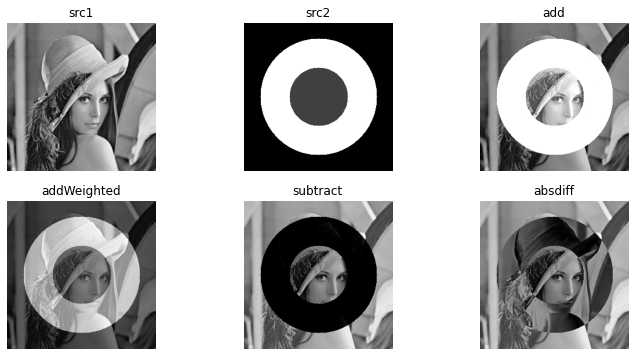

In [40]:
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt


src1 = cv2.imread('fig/images/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros((256, 256), dtype = np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

if src1 is None or src2 is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.add(src1, src2, dtype=cv2.CV_8U)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.figure(figsize = (12, 6))
plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst1, 'gray'), plt.title('add')
plt.subplot(234), plt.axis('off'), plt.imshow(dst2, 'gray'), plt.title('addWeighted')
plt.subplot(235), plt.axis('off'), plt.imshow(dst3, 'gray'), plt.title('subtract')
plt.subplot(236), plt.axis('off'), plt.imshow(dst4, 'gray'), plt.title('absdiff')
plt.show()

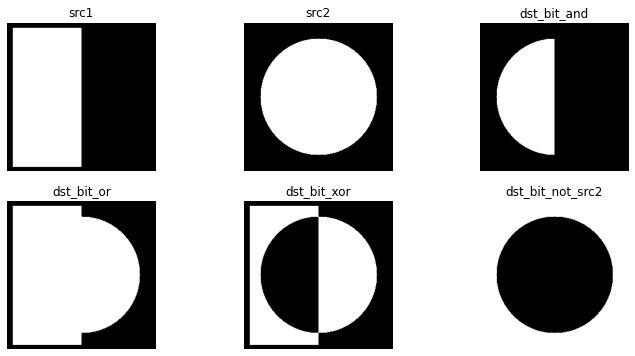

In [44]:
src1 = np.zeros((256, 256), dtype = np.uint8)
# src1[10:246,10:127] = 255
cv2.rectangle(src1, (10, 10), (127, 248), 255, -1) 

src2 = np.zeros((256, 256), dtype = np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)
# cv2.circle(src2, (128, 128), 50, 50, -1)

dst_bit_and= cv2.bitwise_and(src1, src2)
dst_bit_or= cv2.bitwise_or(src1, src2)
dst_bit_xor= cv2.bitwise_xor(src1, src2)
dst_bit_not= cv2.bitwise_not(src2)

plt.figure(figsize = (12, 6))
plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst_bit_and, 'gray'), plt.title('dst_bit_and')
plt.subplot(234), plt.axis('off'), plt.imshow(dst_bit_or, 'gray'), plt.title('dst_bit_or')
plt.subplot(235), plt.axis('off'), plt.imshow(dst_bit_xor, 'gray'), plt.title('dst_bit_xor')
plt.subplot(236), plt.axis('off'), plt.imshow(dst_bit_not, 'gray'), plt.title('dst_bit_not_src2')
plt.show()

In [45]:
src = cv2.imread('./fig/images/flowers.jpg')

B, G, R = cv2.split(src)
dst = cv2.merge([B, G, R])

# b_plane = src[:, :, 0]
# b_plane = src[:, :, 1]
# b_plane = src[:, :, 2]  -> cv2.split과 똑같음
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

H, S, V = cv2.split(src_hsv)

cv2.imshow('src', src)
# cv2.imshow('B', B)
# cv2.imshow('G', G)
# cv2.imshow('R', R)
cv2.imshow('H', H)
cv2.imshow('S', S)
cv2.imshow('V', V)
# 각 채널에서 흰색 그대로 나오는 이유: 모든색을 섞어놓으면 흰색
# hue 채널은 179까지밖에 없음

cv2.waitKey()
cv2.destroyAllWindows()